In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
CarPrice=pd.read_csv('CarPrice_Assignment.csv')

In [69]:
CarPrice.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,0,2,0,0,0,88.6,168.8,64.1,48.8,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,0,2,0,0,0,88.6,168.8,64.1,48.8,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,0,2,1,0,0,94.5,171.2,65.5,52.4,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0,0,4,2,1,0,99.8,176.6,66.2,54.3,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0,0,4,2,2,0,99.4,176.6,66.4,54.3,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0


In [67]:
CarPrice['enginelocation']=CarPrice['enginelocation'].replace({'front':0,'rear':1})
CarPrice['doornumber']=CarPrice['doornumber'].replace({'two':2,'four':4})
CarPrice['fueltype']=CarPrice['fueltype'].replace({'gas':0,'diesel':1})
CarPrice['carbody']=CarPrice['carbody'].replace({'convertible':0, 'hatchback':1, 'sedan':2, 'wagon':3, 'hardtop':4})
CarPrice['aspiration']=CarPrice['aspiration'].replace({'std':0, 'turbo':1})
CarPrice['drivewheel']=CarPrice['drivewheel'].replace({'rwd':0, 'fwd':1,'4wd':2})
CarPrice['cylindernumber']=CarPrice['cylindernumber'].replace({'four':4, 'six':6,'five':5,'three':3, 'twelve':12,'two':2,'eight':8})
CarPrice['fuelsystem']=CarPrice['fuelsystem'].replace({'mpfi':1, '2bbl':2,'mfi':3,'1bbl':4, 'spfi':5,'4bbl':6,'idi':7,'spdi':8})
CarPrice['enginetype']=CarPrice['enginetype'].replace({'dohc':1, 'ohcv':2,'ohc':3,'l':4, 'rotor':5,'ohcf':6,'dohcv':7})

In [68]:
CarPrice=CarPrice.drop(['CarName', 'car_ID', 'symboling'], axis=1)

In [70]:
CarPrice.info()
#CarPrice['fuelsystem'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    int64  
 1   aspiration        205 non-null    int64  
 2   doornumber        205 non-null    int64  
 3   carbody           205 non-null    int64  
 4   drivewheel        205 non-null    int64  
 5   enginelocation    205 non-null    int64  
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    int64  
 12  cylindernumber    205 non-null    int64  
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    int64  
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [74]:
Y_train=CarPrice['price']
X_train=CarPrice.drop('price',axis=1)

In [71]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [77]:
from sklearn.linear_model import LinearRegression

In [80]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [92]:
predict_values=model.predict(X_test)

In [90]:
from sklearn.metrics import mean_absolute_error

In [108]:
Linear_Regression_predict=mean_absolute_error(predict_values,Y_test)

In [94]:
from sklearn.neighbors import KNeighborsRegressor

In [107]:
prediclist=[]
i=1
while(i<=50):
    model2=KNeighborsRegressor(n_neighbors=i)
    model2.fit(X_train,Y_train)
    predicvalue=model2.predict(X_test)
    prediclist.append(mean_absolute_error(predicvalue,Y_test))
    i+=1
KN_predict=min(prediclist)

In [96]:
import seaborn as sb

<Axes: >

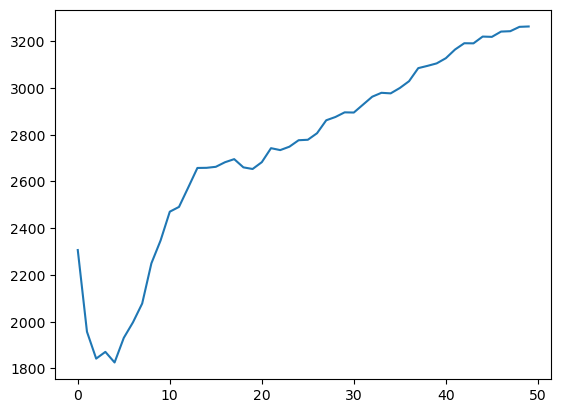

In [105]:
sb.lineplot(x=range(0,50),y=prediclist)

In [109]:
print("Model Error with Linear Regression is ",Linear_Regression_predict)
print("Model Error with KNNeighbour is ",KN_predict)

Model Error with Linear Regression is  2103.1528767681607
Model Error with KNNeighbour is  1825.532793548387
